# Logistic Regression
### Jack Bennetto
#### March 20, 2018

## Standards/Objectives

 * Place logistic regression in the taxonomy of ML algorithms
 * Explain the key differences and similarities between logistic and linear regression.
 * Fit and interpret a logistic regression model in scikit-learn
 * Interpret the coefficients of logistic regression, using odds ratio

## Logistic regression as a model

Logistic regression is a **supervised-learning** **parametric** **classification** model.

A supervised-learning model is one in which we predict a target (or label or $y$) based on the values of the features (or $x$s). The alternative (an unsupervised model) tries to discover something about the data without predicting a specific value.

A parametric model is fit with a fixed number of parameters. Non-parametric models can by arbitrarily complex based on the data.

Supervised-learning models are (usually) either **regressors** or classifiers. With regressors the target is a number; given values for features it will predict a numeric value.

For a classifier (like logistic regression), the target is categorical. Mostly we'll discuss binary classifiers but consider multinomial classification as well. Our model will (or at least, should) predict the probability that the target would be in each possible class, rather than simply the "best" class. Some classifiers only predict a class rather than probabilities; these are called **hard classifiers**. **Soft classifiers** are more useful; we'll talk more about this in the coming days.

Logistic regression is generally the first thing you try when building a classifier and is actually used in some production environments.

Advantages:

 * Fast (for training and prediction)
 * Simple (few hyperparameters)
 * Interpretable
 * Provides good probabilities
 
Disadvantages

 * Requires feature engineering to capture non-linear relationships
 * Doesn't work for p > n

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
import itertools

## Why not linear regression?

Let's suppose we have some (fake) data, but that $y$ (the target) is always either 0 or 1.

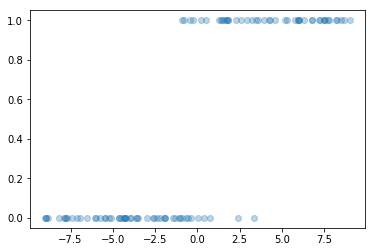

In [3]:
npts = 100

X = stats.uniform(-9, 18).rvs(npts).reshape(npts,1)
y = stats.bernoulli(scipy.special.expit(X[:,0])).rvs(npts)

fig, ax = plt.subplots()
ax.plot(X, y, 'o', alpha=0.3)

We just learned linear regression. Let's use that to predict $y$!

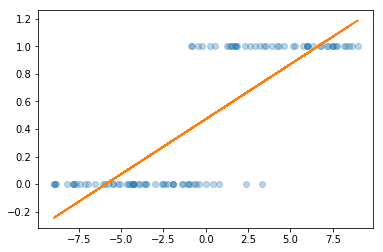

In [4]:
model = LinearRegression()
model.fit(X, y)
ax.plot(X, model.predict(X))
fig

Discussion: what's wrong with this?

## Comparison to linear regression

Recall that with linear regression created a model like

$$\begin{align}
\hat{Y} & = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... \beta_p X_p \\
  & = \mathbf{X} \beta
\end{align}$$

We tried to find the "best" line such that all the values of $\hat{Y}$ were as close to the corresponding values of $Y$ as possible. We defined this using a **loss function** that measured how bad of a job we did, and found the parameters for the line that would minimize that.

For a loss function we choose the sum of squares of the residuals:

$$\text{Loss function} = \sum{(\hat{Y}_i - Y_i) ^ 2}$$

For a classification problem is

## Scoring rules

There are a few different options for scoring rules.


We'll take $y_i = 1$ for the correct value and $

#### Logarithmic



#### Brier



#### Spherical




## MLE formulation


For logistic regression we'll change a couple things. First, we aren't going to use a line.

$$\begin{align}
Y & = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... \beta_p X_p + \epsilon \\
  & = \mathbf{X} \beta + \epsilon
\end{align}$$

where again

$$\epsilon \sim N(0, \sigma)$$


Alternatively, we could say
$$Y \sim N(\mathbf{X} \beta, \sigma)$$

From there, we want to find the values for $\beta$ that are the most likely to produce the data. The MLE estimate gives us ordinary least squares.

Question: what is MLE?

Discussion: how can we to the build a classification model?

### Constructing a model

To do any sort of prediction we need to create a model. Since we have two possible values of $y$ we assume the data is the result of a Bernoulli distribution, where $p$ is a function of $\mathbf{X}$.

$$Y \sim Bernoulli(f(\mathbf{X}))$$

We want our model to include some parameters so, as with linear regression, we'll have the function depend on the product of those parameters and $\mathbf{X}$.

$$Y \sim Bernoulli(f(\mathbf{X} \beta))$$

or


$$Y \sim Bernoulli(f(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... \beta_p X_p)$$

For $f$ we want a function with values from 0 to 1, what's called a sigmoid function. There are a number of different choices, but (for reasons we'll talk about later), the usual choice is something called the logistic function.

$$f(x) = \frac{1}{1+e^{-x}}$$

Question: now that we have a model, how should we find the best fit?

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
xpts = np.linspace(-6, 6, 100)
ax.plot(xpts, 1/(1+np.exp(-xpts)), label='logistic', lw=2)
ax.plot(xpts, stats.norm(0,1).cdf((2*np.pi)**.5/4 * xpts), label='error function/cdf of gaussian (rescaled)')
ax.plot(xpts, np.arctan(np.pi/4*xpts)/np.pi + 0.5, label='arctan (rescaled)')
ax.legend()
ax.set_title("Assorted monotonic functions going from 0 to 1")
ax.set_ylim(0, 1)

Again, we solve with maximum-likelihood estimation. Note that there isn't a close-form solution here; the computer has to solve numerically using some form of gradiant descent (we'll talk about this in the next few days).

## Example (with fake data)

We'll generate fake data that matches the distribution exactly and try to recover the parameters.

In [ ]:
def logistic(x):
    return 1/(1 + np.exp(-x))

In [ ]:
npts = 100
beta0 = 0.0
beta1 = 0.5

X = stats.uniform(-9, 18).rvs(npts).reshape(npts,1)
# the expit function is the same as the logistic function
y = stats.bernoulli(logistic(beta0 + beta1*X[:,0])).rvs(npts)

We graph the data; the vertical line shows the actual decision boundary where the probability is 0.5.

In [ ]:
jitter = stats.uniform(-0.03,0.06).rvs(npts)
fig, ax = plt.subplots()
ax.scatter(X[:,0], y + jitter, s=10, alpha=0.5)
ax.axvline(-beta0/beta1, color='black')

In [ ]:
# set C large to suppress regularization
model = LogisticRegression(C=1000)
model.fit(X, y)
beta0hat = model.intercept_[0]
beta1hat = model.coef_[0][0]
print("beta0 =    {0:8.3f} beta1 =    {1:8.3f}".format(beta0, beta1))
print("beta0hat = {0:8.3f} beta1hat = {1:8.3f}".format(beta0hat, beta1hat))

Let's draw the curve we fitted on the data, along with the actual curve used to create the data.


In [ ]:
xpts = np.linspace(-9, 9, 100)
yhatpts = logistic(beta0hat + beta1hat * xpts)
ypts = logistic(beta0 + beta1 * xpts)

jitter = stats.uniform(-0.03,0.06).rvs(npts)

fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0], y + jitter, s=10, alpha=0.5, color='blue', label="generated data")
ax.plot(xpts, ypts, 'k', label='actual curve')
ax.plot(xpts, yhatpts, 'r', label='fitted curve')
ax.axhline(0.5, color='black')
#ax.axvline(-beta0/beta1, color='black', label='actual boundary')
ax.set_title("Fitted logistic curve")
ax.legend(loc='center right')

## Log odds ratio

In gampling people often talk about **odds**. If the local sportsball is favored to win 3-to-1 (or 3:1), that means that the ratio of the probability of winning is three times as great as the probability of loosing, so they have a 75% chance of winning. Odd of 1:1 are even; they are as likely to win as the are to loose.

(In gambling people always give the larger number first, so a 25% chance of winning is said to be 3:1 against. We won't do that.)

The **odds ratio** is the ratio of the of the probablity of the positive to the negative case, i.e., 

$$OR = \frac{P(y=1)}{1-P(y=1)}$$

Question: what's the odds ratio if $P(y=1) = 0.5$?

Question: what if the probability of the positive class is 80%?

Question: what if it's 20%?

Question: what if it's 10%?

The **log odds ratio** is just the log (base e) of that.

Question: what is the log odds ratio if $P(y=1) = 0.5$

Question: what if it's 80%?

Question: what if it's 20%?

So what does that have to do with logistic regression? The logistic function takes the log odds of something and returns the probability. Let's explore this a bit more.

In [ ]:
xpts = np.linspace(-5, 5)
fig, ax = plt.subplots(figsize=(12,10))

ax.plot(xpts, logistic(xpts))

xticks = np.arange(-5, 6, 1)
ax.set_xticks(xticks)
ax.set_yticks(logistic(xticks))

ax.grid(color='g', linestyle='-', linewidth=1, alpha=0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-0, 1)
ax.set_title("Logistic function")
ax.set_xlabel("log odds ratio")
ax.set_ylabel("probability")
plt.show()

In [ ]:
x = np.arange(-10, 11)
df = pd.DataFrame(['{:.3f}%'.format(a*100) for a in logistic(x)], index=x, columns=['probability'])
df.index.name = 'log odds ratio'
df

### The math

If you're doing logistic regression, then the probability of something being in the positive class is
$$P(y=1) = \frac{1}{1+e^{-\mathbf{X}\beta}}$$

so

$$\begin{align}
OR &= \frac{P(y=1)}{1-P(y=1)} \\
   &= \frac{\frac{1}{1+e^{-\mathbf{X}\beta}}}{1-\frac{1}{1+e^{-\mathbf{X}\beta}}} \\
   &= \frac{\frac{1}{1+e^{-\mathbf{X}\beta}}}{\frac{1+e^{-\mathbf{X}\beta}}{1+e^{-\mathbf{X}\beta}}-\frac{1}{1+e^{-\mathbf{X}\beta}}} \\
   &= \frac{1}{e^{-\mathbf{X}\beta}} \\
   &= e^{\mathbf{X}\beta}
\end{align}
$$
so
$$log(OR) = \mathbf{X}\beta$$

So if you increase $X_i$ by 1, you increase $log(OR)$ by $\beta_i$.

## Decision boundary

Over the next couple weeks we'll talk about a number of different classification models. A good model will do more than just predict to which class something belongs; it will predict the probability that it is in that class.

At some point, though, we need to make a decision. To do that we choose a **threshold** at which we will place something in one class or the other. The **decision boundary** is the surface in feature space at which the probability is equal to the threshold.

Suppose we have two features, $X_1$ and $X_2$, and we set the threshold equal to 0.5. That corresponds to a log odds ratio of 0 so the decision boundary is at

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$$

so

$$ X_2 = \frac{-\beta_0}{\beta_2} + \frac{-\beta_1}{\beta_2}X_1 $$

More broadly, for threshold $\theta$, the decision boundary is the region for which

$$\theta = \frac{1}{1+e^{-\mathbf{X} \beta}}$$

$$\theta + \theta e^{-\mathbf{X} \beta} = 1$$

$$e^{-\mathbf{X} \beta} = \frac{1 - \theta}{\theta}$$

$$\mathbf{X} \beta = \ln{(\frac{\theta}{1 - \theta})}$$

Which again is the log odds ratio, so

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 = \ln{(\frac{\theta}{1 - \theta})}$$

so

$$X_1 = \frac{\ln{(\frac{\theta}{1 - \theta})} - \beta_0}{\beta_2} +  \frac{-\beta_1}{\beta_2}X_1 $$

In [ ]:
def generate_classes(nptses, mus, sds):
    """
    Generate normally distributed points in multiple classes
    Parameters
    ----------
    nptses : array_like (1-d)
        sequence of numbers, the count of points in each class
    mus : array_like (2-d)
        sequence of vectors, the means of the multivariate distributions for each class
    mus : array_like (3-d)
        sequence of 2-d symmetric tensors, the standard deviation of the multivariate
        distributions for each class
        
    Returns
    -------
    X : array (2-d)
        features of generated points
    y : array (2-d)
        integer labels of points, starting at 0
    """

    X = np.zeros((0,2))
    y = np.zeros((0,))
    
    for i, npts, mu, sd in zip(itertools.count(), nptses, mus, sds):
        X = np.concatenate([X, stats.multivariate_normal(mu, sd).rvs(npts)])
        y = np.concatenate([y, np.ones(npts)*i])
    return X, y
        

In [ ]:
X, y = generate_classes((1000,1000),
                       ((2.0, 2.5),
                        (6.0, 0.0)),
                       (((2.0, 0),
                         (0, 3.0)),
                        ((2.5, 0),
                         (0, 3.0)))
                       )

In [ ]:
def decision_boundary_x2(x, b0, b1, b2, threshold):
    return (np.log((1 - threshold)/threshold) - b0 - x*b1 )/b2

def plot_decision_boundary(X, y, model, ax=None):
    '''plot 2-d array of points, with decision boundaries'''
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(X[:,0], X[:,1], color=np.where(y, 'g', 'b'), alpha=0.5, s=3)
    ax.plot(*X[y==0].mean(axis=0).reshape(-1,1), color='b', marker='+', mew=4, ms=20)
    ax.plot(*X[y==1].mean(axis=0).reshape(-1,1), color='g', marker='+', mew=4, ms=20)
    ax.axis('equal')

    xmin, xmax = X[:,0].min(), X[:,0].max()
    xrng = np.array([2*xmin-xmax, 2*xmax-xmin])

    ylim = ax.get_ylim()
    xlim = ax.get_xlim()

    beta0 = model.intercept_
    beta1, beta2 = model.coef_[0]
    print (beta0, beta1, beta2)
    
    for threshold, ls in zip(1/(1+np.exp(-np.arange(-3,4))), [':', '-.', '--', '-', '--', '-.', ':']):
        ax.plot(xrng,
                decision_boundary_x2(xrng, beta0, beta1, beta2, threshold),
                color='r',
                ls=ls,
                label="{:.2f}%".format(threshold*100))
    ax.legend(title='threshold')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
X, y = generate_classes((1000,1000),
                       ((2.0, 2.5),
                        (6.0, 0.0)),
                       (((2.0, 0),
                         (0, 3.0)),
                        ((2.5, 0),
                         (0, 3.0)))
                       )
model = LogisticRegression(C=1000, intercept_scaling=100)
model.fit(X, y)

plot_decision_boundary(X, y, model)

### (end of morning lecture)

In [ ]:
fig, ax = plt.subplots()
mu1 = 0
mu2 = 3
sd1 = 1
sd2 = 1


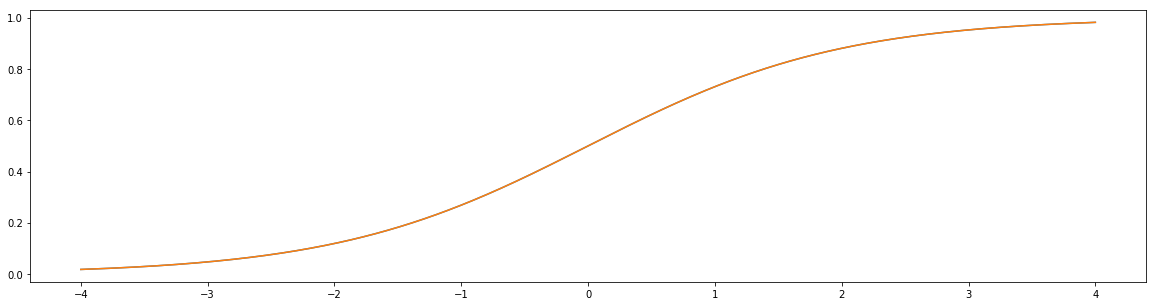

In [45]:
mu = 0.25
fig, ax = plt.subplots(figsize=(20,5))
xpts = np.linspace(-4, 4, 500)
ypts = 1/(1 + np.exp(-xpts))

n1 = np.exp(-(xpts-mu)**2)
n2 = np.exp(-(xpts+mu)**2)

ypts2 = n1 / (n1+n2)
#ypts2 = np.exp(-xpts**2)
ax.plot(xpts, ypts)
ax.plot(xpts, ypts2)

# Afternoon Lecture – Evaluating a Binary Classifier


## Confusion matrix

A [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) gives the count of instances based on the actual and predicted values of the target. For a binary classifier it looks like

|                    |Predicted positive|Predicted negative |
|--------------------|------------------|---------------|
| **Actual positive**| true positive    | false negative|
| **Actual negative**| false positive   | true negative |


*True* and *false* refer to whether you are correct.

*Positive* and *negative* refer to the **predicted** result.

A *type-I error* is a false positive (which I remember because that phrase is more common than false negative).

Accuracy $= \frac{TP+TN}{TP+TN+FP+FN}$

Sensitivity = Recall = TPR $= \frac{TP}{TP+FN}$

FPR $= \frac{FP}{TN+FP}$

Specificity $= \frac{TN}{TN+FP}$

Precision = PPV $= \frac{TP}{TP+FP}$

NPV $= \frac{TN}{TN+FN}$

![confusion matrix](Confusion_Matrix.png)

#### F-score

$F_\beta$ evaluates a test assuming that recall is $\beta$ times as important as precision; it's a weighted harmonic mean of the two.

$$F_\beta = (1+\beta^2) \frac{\text{precision} \cdot \text{recall}}{\beta^2\text{precision} + \text{recall} } $$

$$F_1 = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall} }  = \frac{1}{\frac{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}{2}}$$

## ROC Curves

Any decent classification model will provide the probabilities that a data point is in one class or another. To visualize the overally goodness of a model we use a Receiver Operator Characteristic curve, which shows the TPR (a.k.a Sensitivity) and FPR (a.k.a. 1-Specificity) for various thresholds.

Any alternative is the Precision-recall curve, which is more appropriate when you're more interested in the positive class.

Models can be compared by the Area Under the Curve (AUC) of either graph.

In [ ]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

In [ ]:
X, y = generate_classes((1000,1000),
                       ((2.0, 2.5),
                        (6.0, 0.0)),
                       (((2.0, 0),
                         (0, 3.0)),
                        ((2.5, 0),
                         (0, 3.0)))
                       )
model = LogisticRegression(C=1000)
model.fit(X, y)

In [ ]:
fig, (ax0, ax1, ax3) = plt.subplots(1,3, figsize=(18,6))
df = calculate_threshold_values(model.predict_proba(X)[:,1], y)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)
plot_decision_boundary(X, y, model, ax3)

The "random" black line is a model that guesses the class randomly, parameterized by the probability of guessing one class or another.

There's a probabilistic interpretation of the AUC; Matt discusses it in http://madrury.github.io/jekyll/update/statistics/2017/06/21/auc-proof.html
